# Agglomerative Clustering in Python and scikit-learn

In this lab, you will learn how to work with a dataset that lies in a manifold and the structure of the data is not easy to handle linearly.


In [1]:
import time as time
import numpy as np
import matplotlib.pyplot as plt
import mpl_toolkits.mplot3d.axes3d as p3
from sklearn.cluster import AgglomerativeClustering
from sklearn.datasets import make_swiss_roll

# Agglomerative Clustering

We'll use a hierarchical clustering, implemented through the [`AgglomerativeClustering`](https://scikit-learn.org/stable/modules/generated/sklearn.cluster.AgglomerativeClustering.html) class from sciki-learn, and you'll see how different types of linkages structure the same data differently.
## Compare Linkages
Here, we will identify which linkages are better for different structures of data in 2D.

I provide a function to plot the clusters. This time, you have to provide the title of the plot. I encourage you to change the parameters that generate the toy datasets, and explore the [datasets](https://scikit-learn.org/stable/modules/classes.html#module-sklearn.datasets) documentation to if you want to explore with further datasets provided by scikit-learn. Here, we explore 4 toy datasets:

* **Circles:** 2 concentric circles. We would like to see datapoints in each circle assigned to the same cluster
* **Two moons:** 2 half moons placed with one end into the opening of the other. We would like to see datapoints in each moon assigned to the same cluster.
* **Separated Blobs of datapoints:** We would like to see datapoints in each blob asssigned to the same cluster.
* **Separated Blobs of datapoints with different variance:** We would like to see datapoints in each blob asssigned to the same cluster

TIPS:
* some of the generated datasets have different number of clusters, be sure to take that into account when fitting the data

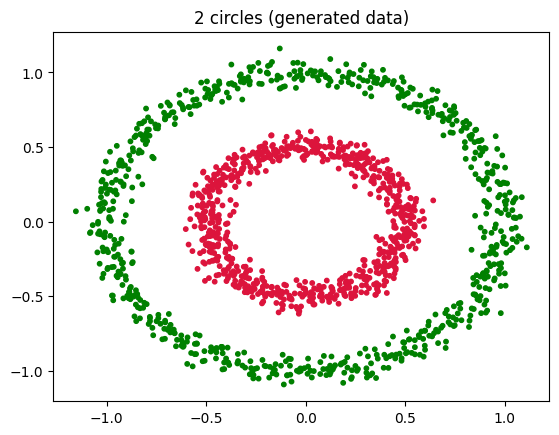

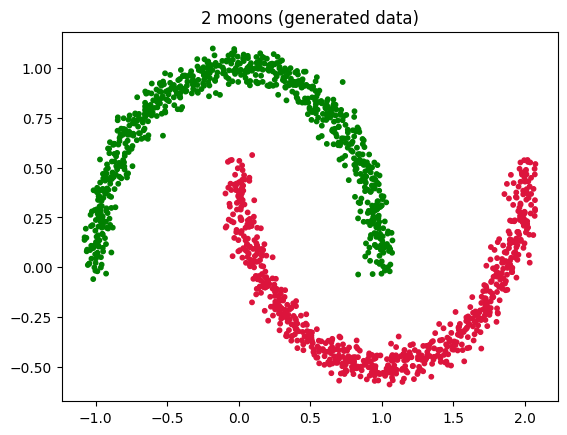

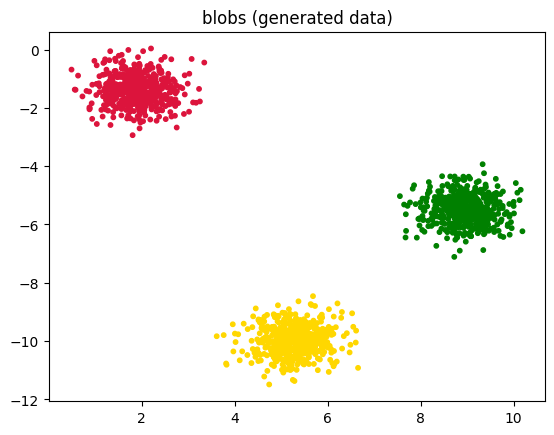

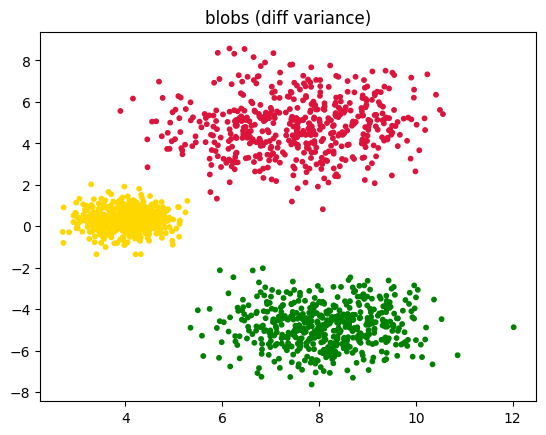

In [18]:
from sklearn import datasets
from itertools import cycle, islice

circles_points, circles_labels = datasets.make_circles(n_samples=1500, factor=0.5, noise=.05)
two_moons_points, two_moons_labels = datasets.make_moons(n_samples=1500, noise=.05)
blobs_points, blobs_labels = datasets.make_blobs(n_samples=n_samples, 
                                                 cluster_std=[.5, .5, .5],
                                                 random_state=200)
varied_points, varied_labels = datasets.make_blobs(n_samples=n_samples,
                                                   cluster_std=[1.0, 1.3, 0.5],
                                                   random_state=150)
def plot_clusters(X, labels=None, title=''):
    palette = ['green', 'crimson', 'gold', 'steelblue', 'orange']
    if labels is None:
        labels = [0] * X.shape[0]
        colors = np.array(['red'] * X.shape[0])
    else:
        colors = np.array(list(islice(cycle(palette), int(max(labels) + 1))))
    plt.figure()
    plt.scatter(X[:,0], X[:,1], s=10, color = colors[labels])
    plt.title(title)
    plt.show()

#visualise all the toy datasets
plot_clusters(circles_points, circles_labels, title='2 circles (generated data)')
plot_clusters(two_moons_points, two_moons_labels, title='2 moons (generated data)')
plot_clusters(blobs_points, blobs_labels, title='blobs (generated data)')
plot_clusters(varied_points, varied_labels, title='blobs (diff variance)')

### Exercise 1
Let's explore the impact of the different linkages in the 2 circles dataset and plot the results.

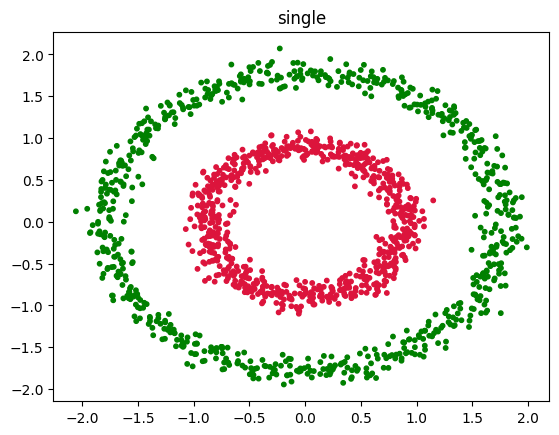

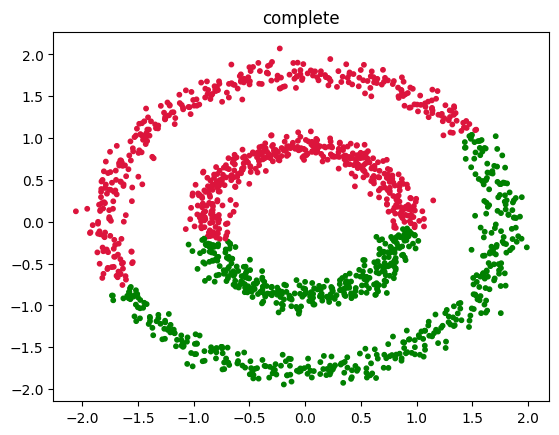

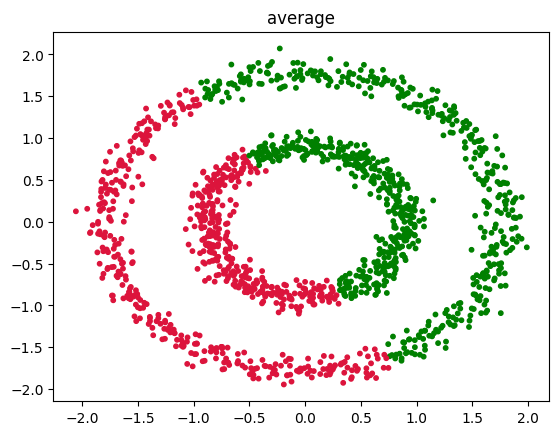

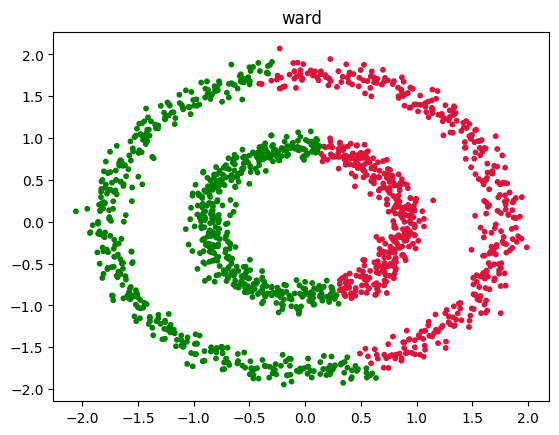

In [22]:
from sklearn.preprocessing import StandardScaler

ward = AgglomerativeClustering(n_clusters=2, linkage='ward')
complete = AgglomerativeClustering(n_clusters=2, linkage='complete')
average = AgglomerativeClustering(n_clusters=2, linkage='average')
single = AgglomerativeClustering(n_clusters=2, linkage='single')

algorithms = [single, complete, average, ward]
names = ['single', 'complete', 'average', 'ward']
X = StandardScaler().fit_transform(circles_points)

for alg, name in zip(algorithms, names):
    # fit the algorithm
    alg.fit(X)
    plot_clusters(X, alg.labels_, name)

### Exercise 2
Explore the impact of the different linkages in the 2 moons dataset and plot the results. Leave the linkage that appears to work the best as the first plot, followed by the remaining linkages to visualise the results.

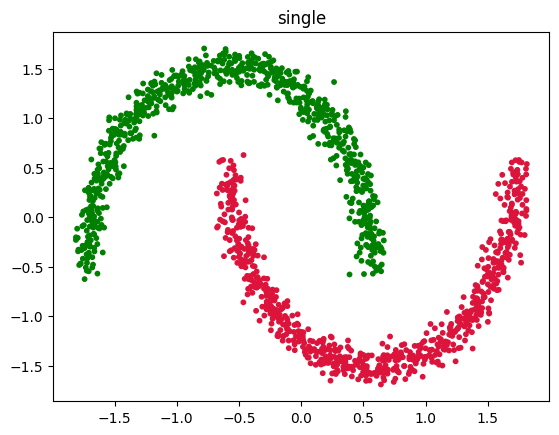

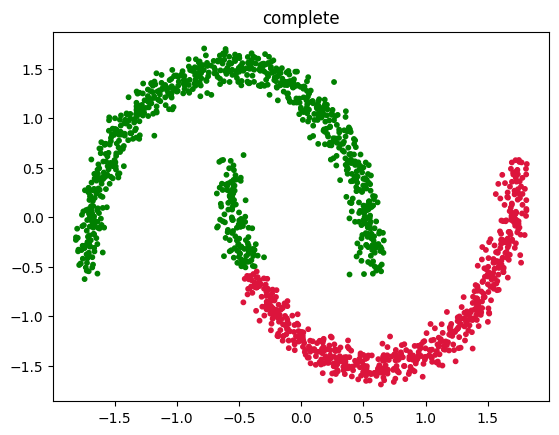

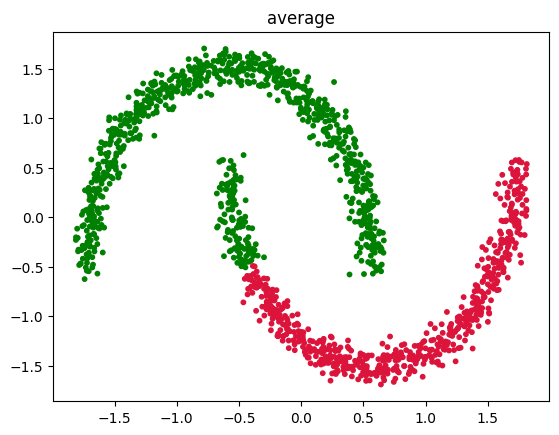

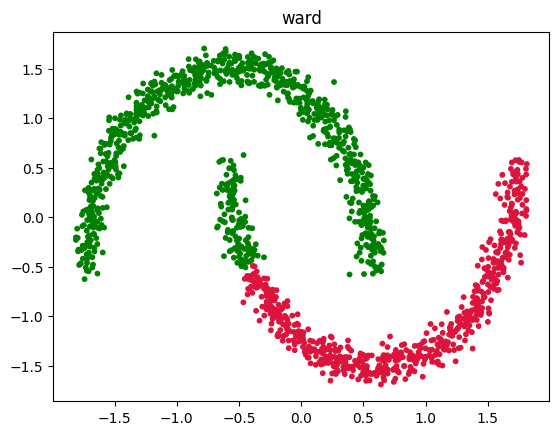

In [23]:
# Use this cell to write your code. 
# Remember that you can use the plot_clusters function defined above
# to visualise your results, you don't have to redefine it.
from sklearn.preprocessing import StandardScaler

ward = AgglomerativeClustering(n_clusters=2, linkage='ward')
complete = AgglomerativeClustering(n_clusters=2, linkage='complete')
average = AgglomerativeClustering(n_clusters=2, linkage='average')
single = AgglomerativeClustering(n_clusters=2, linkage='single')

algorithms = [single, complete, average, ward]
names = ['single', 'complete', 'average', 'ward']
X = StandardScaler().fit_transform(two_moons_points)

for alg, name in zip(algorithms, names):
    # fit the algorithm
    alg.fit(X)
    plot_clusters(X, alg.labels_, name)

### Exercise 3
Explore the impact of the different linkages in the separated blobs dataset and plot the results. 

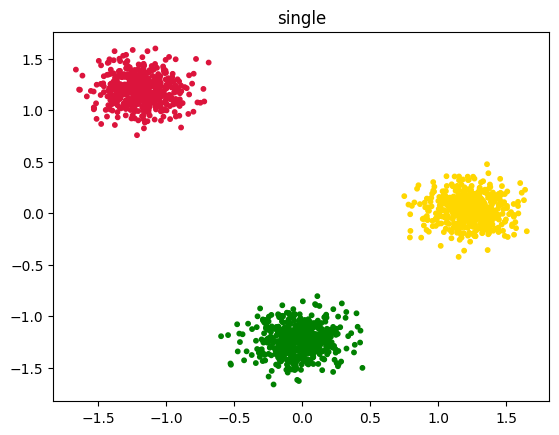

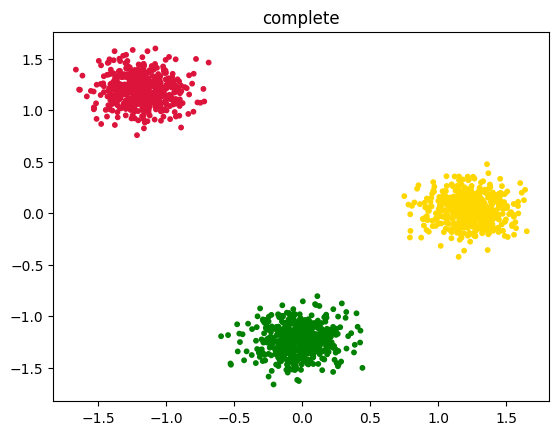

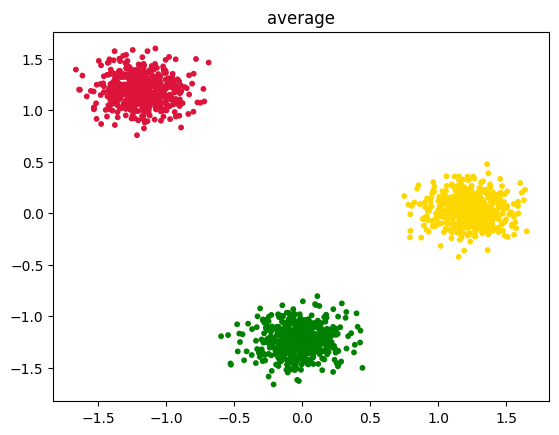

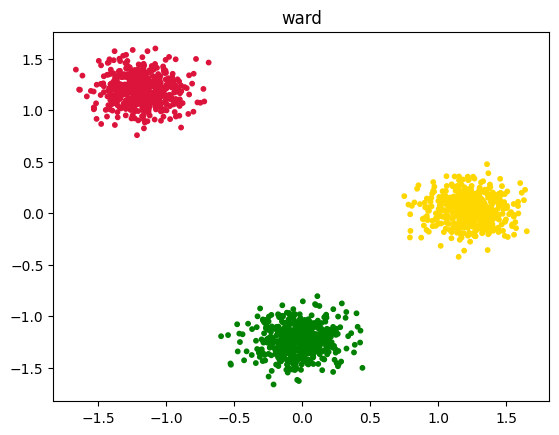

In [24]:
# Use this cell to write your code. 
# Remember that you can use the plot_clusters function defined above
# to visualise your results, you don't have to redefine it.
from sklearn.preprocessing import StandardScaler

ward = AgglomerativeClustering(n_clusters=3, linkage='ward')
complete = AgglomerativeClustering(n_clusters=3, linkage='complete')
average = AgglomerativeClustering(n_clusters=3, linkage='average')
single = AgglomerativeClustering(n_clusters=3, linkage='single')

algorithms = [single, complete, average, ward]
names = ['single', 'complete', 'average', 'ward']
X = StandardScaler().fit_transform(blobs_points)

for alg, name in zip(algorithms, names):
    # fit the algorithm
    alg.fit(X)
    plot_clusters(X, alg.labels_, name)

### Exercise 4
Explore the impact of the different linkages in the separated blobs with different variance dataset and plot the results. Leave the linkage that appears to work the best as the first plot, followed by the remaining linkages to visualise the results.

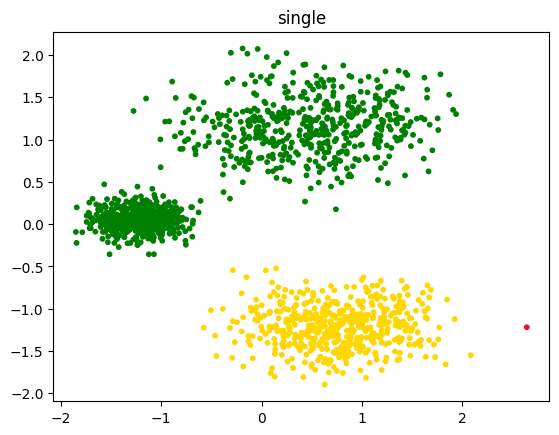

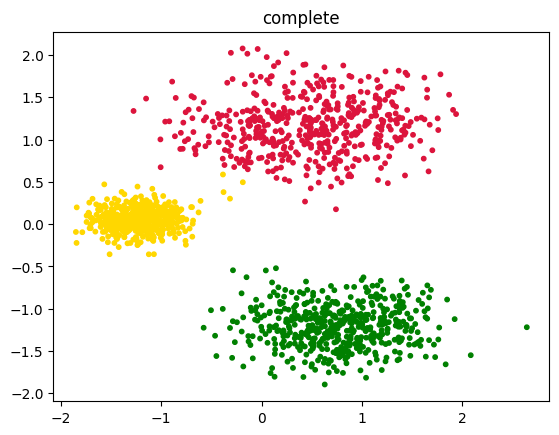

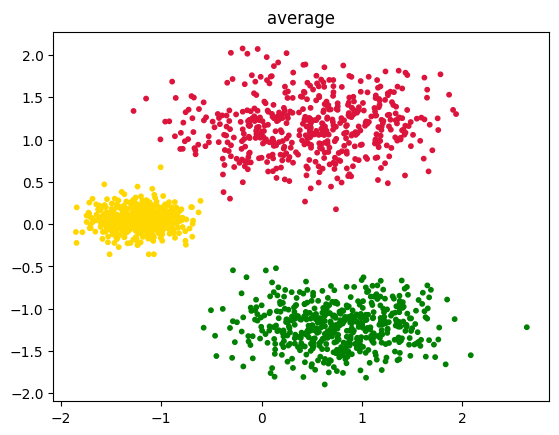

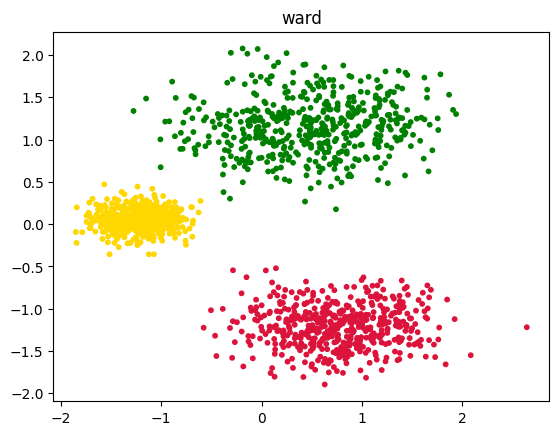

In [25]:
ward = AgglomerativeClustering(n_clusters=3, linkage='ward')
complete = AgglomerativeClustering(n_clusters=3, linkage='complete')
average = AgglomerativeClustering(n_clusters=3, linkage='average')
single = AgglomerativeClustering(n_clusters=3, linkage='single')

algorithms = [single, complete, average, ward]
names = ['single', 'complete', 'average', 'ward']

X = StandardScaler().fit_transform(varied_points)

for alg, name in zip(algorithms, names):
    # fit the algorithm
    alg.fit(X)
    plot_clusters(X, alg.labels_, name)